# Company Default Data

In [70]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")


Let us now go ahead and read the dataset and check the first five rows of the dataset.

#### Importing the dataset

In [71]:
pd.set_option('display.max_rows', None) 

In [72]:
Company = pd.read_excel("Company_Data2015-1.xlsx")

#Glimpse of Data
Company.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                      45.00                          0.00   
1                       2.00                          0.31   
2                       0.00                         -0.03   
3                       2.00                          0.24   
4                       0.00                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

#### Fixing messy column names (containing spaces) for ease of use

In [73]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

#### Checking top 5 rows again

In [74]:
Company.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block_  Net_Working_Capital_  \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current_Assets_  ...  PBIDTM_perc[Latest]  PBITM_perc[Latest]  \
0            40.50  ...                 0.00                0.00   
1           486.86  ...               -10.30              -39.74   
2          9097.64  ...             -5279.14            -5516.98   
3          1034.12  ...                -3.33               -7.21   
4          4685.81  ...              -295.55             -400.55   

   PBDTM_perc[Latest]  CPM_perc[Latest]  APATM_perc[Latest]  \
0                0.00              0.00                0.00   
1              -57.74            -57.74              -87.18   
2            -7780.25          -7723.67            -7961.51   
3              -48.13            -47.70              -51.58   
4             -845.88            379.79              274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                      0                        0                    45.00   
1                     29                      101                     2.00   
2                     97                      558                     0.00   
3                     93                       63                     2.00   
4                   3887                      346                     0.00   

   Value_of_Output_to_Total_Assets  Value_of_Output_to_Gross_Block  
0                             0.00                            0.00  
1                             0.31                            0.24  
2                            -0.03                           -0.26  
3                             0.24                            1.90  
4                             0.01                            0.05  

[5 rows x 67 columns]

#### Now, let us check the number of rows (observations) and the number of columns (variables)

In [75]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


#### Checking datatype of all columns

In [76]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [77]:
Company.drop('Co_Code', axis = 1, inplace = True)

In [78]:
Company.drop('Co_Name', axis = 1, inplace = True)

In [79]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Networth_Next_Year                   3586 non-null   float64
 1   Equity_Paid_Up                       3586 non-null   float64
 2   Networth                             3586 non-null   float64
 3   Capital_Employed                     3586 non-null   float64
 4   Total_Debt                           3586 non-null   float64
 5   Gross_Block_                         3586 non-null   float64
 6   Net_Working_Capital_                 3586 non-null   float64
 7   Current_Assets_                      3586 non-null   float64
 8   Current_Liabilities_and_Provisions_  3586 non-null   float64
 9   Total_Assets_to_Liabilities_         3586 non-null   float64
 10  Gross_Sales                          3586 non-null   float64
 11  Net_Sales                     

#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [80]:
Company.describe()

Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  \
count             3586.00         3586.00   3586.00           3586.00   
mean               725.05           62.97    649.75           2799.61   
std               4769.68          778.76   4091.99          26975.14   
min              -8021.60            0.00  -7027.48          -1824.75   
25%                  3.98            3.75      3.89              7.60   
50%                 19.02            8.29     18.58             39.09   
75%                123.80           19.52    117.30            226.60   
max             111729.10        42263.46  81657.35         714001.25   

       Total_Debt  Gross_Block_  Net_Working_Capital_  Current_Assets_  \
count     3586.00       3586.00               3586.00          3586.00   
mean      1994.82        594.18                410.81          1960.35   
std      23652.84       4871.55               6301.22         22577.57   
min         -0.72        -41.19             -13162.42            -0.91   
25%          0.03          0.57                  0.94             4.00   
50%          7.49         15.87                 10.14            24.54   
75%         72.35        131.90                 61.17           135.28   
max     652823.81     128477.59             223257.56        721166.00   

       Current_Liabilities_and_Provisions_  Total_Assets_to_Liabilities_  ...  \
count                              3586.00                       3586.00  ...   
mean                                391.99                       1778.45  ...   
std                                2675.00                      11437.57  ...   
min                                  -0.23                         -4.51  ...   
25%                                   0.73                         10.55  ...   
50%                                   9.23                         52.01  ...   
75%                                  65.65                        310.54  ...   
max                               83232.98                     254737.22  ...   

       PBIDTM_perc[Latest]  PBITM_perc[Latest]  PBDTM_perc[Latest]  \
count              3585.00             3585.00             3585.00   
mean                -51.16             -109.21             -311.57   
std                1795.13             3057.64            10921.59   
min              -78870.45          -141600.00          -590500.00   
25%                   0.00                0.00                0.00   
50%                   8.07                5.23                4.69   
75%                  18.99               14.29               14.11   
max               19233.33            19195.70            15640.00   

       CPM_perc[Latest]  APATM_perc[Latest]  Debtors_Velocity_Days  \
count           3585.00             3585.00                3586.00   
mean            -307.01             -365.06                 603.89   
std            10676.15            12500.05               10636.76   
min          -572000.00          -688600.00                   0.00   
25%                0.00                0.00                   8.00   
50%                3.89                1.59                  49.00   
75%               11.39                7.41                 106.00   
max            15640.00            15266.67              514721.00   

       Creditors_Velocity_Days  Inventory_Velocity_Days  \
count                  3586.00                  3483.00   
mean                   2057.85                    79.64   
std                   54169.48                   137.85   
min                       0.00                  -199.00   
25%                       8.00                     0.00   
50%                      39.00                    35.00   
75%                      89.00                    96.00   
max                 2034145.00                   996.00   

       Value_of_Output_to_Total_Assets  Value_of_Output_to_Gross_Block  
count                          3586.00                         3586.00  
mean        

In [81]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  \
count             3586.00         3586.00   3586.00           3586.00   
mean               725.05           62.97    649.75           2799.61   
std               4769.68          778.76   4091.99          26975.14   
min              -8021.60            0.00  -7027.48          -1824.75   
25%                  3.98            3.75      3.89              7.60   
50%                 19.02            8.29     18.58             39.09   
75%                123.80           19.52    117.30            226.60   
max             111729.10        42263.46  81657.35         714001.25   

       Total_Debt  Gross_Block_  Net_Working_Capital_  Current_Assets_  \
count     3586.00       3586.00               3586.00          3586.00   
mean      1994.82        594.18                410.81          1960.35   
std      23652.84       4871.55               6301.22         22577.57   
min         -0.72        -41.19             -13162.42            -0.91   
25%          0.03          0.57                  0.94             4.00   
50%          7.49         15.87                 10.14            24.54   
75%         72.35        131.90                 61.17           135.28   
max     652823.81     128477.59             223257.56        721166.00   

       Current_Liabilities_and_Provisions_  Total_Assets_to_Liabilities_  ...  \
count                              3586.00                       3586.00  ...   
mean                                391.99                       1778.45  ...   
std                                2675.00                      11437.57  ...   
min                                  -0.23                         -4.51  ...   
25%                                   0.73                         10.55  ...   
50%                                   9.23                         52.01  ...   
75%                                  65.65                        310.54  ...   
max                               83232.98                     254737.22  ...   

       PBIDTM_perc[Latest]  PBITM_perc[Latest]  PBDTM_perc[Latest]  \
count              3585.00             3585.00             3585.00   
mean                -51.16             -109.21             -311.57   
std                1795.13             3057.64            10921.59   
min              -78870.45          -141600.00          -590500.00   
25%                   0.00                0.00                0.00   
50%                   8.07                5.23                4.69   
75%                  18.99               14.29               14.11   
max               19233.33            19195.70            15640.00   

       CPM_perc[Latest]  APATM_perc[Latest]  Debtors_Velocity_Days  \
count           3585.00             3585.00                3586.00   
mean            -307.01             -365.06                 603.89   
std            10676.15            12500.05               10636.76   
min          -572000.00          -688600.00                   0.00   
25%                0.00                0.00                   8.00   
50%                3.89                1.59                  49.00   
75%               11.39                7.41                 106.00   
max            15640.00            15266.67              514721.00   

       Creditors_Velocity_Days  Inventory_Velocity_Days  \
count                  3586.00                  3483.00   
mean                   2057.85                    79.64   
std                   54169.48                   137.85   
min                       0.00                  -199.00   
25%                       8.00                     0.00   
50%                      39.00                    35.00   
75%                      89.00                    96.00   
max                 2034145.00                   996.00   

       Value_of_Output_to_Total_Assets  Value_of_Output_to_Gross_Block  
count                          3586.00                         3586.00  
mean        

#### Creating a binary target variable using 'Networth_Next_Year' 

In [82]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

#### Checking top 10 rows

In [232]:
Company[['default','Networth_Next_Year']].head(10)

default  Networth_Next_Year
0        1            -8021.60
1        1            -3986.19
2        1            -3192.58
3        1            -3054.51
4        1            -2967.36
5        1            -2519.40
6        1            -2125.05
7        1            -2100.56
8        1            -1695.75
9        1            -1677.18

In [233]:
Company[['default','Networth_Next_Year']].tail(10)

default  Networth_Next_Year
3576        0            43811.23
3577        0            46637.38
3578        0            47261.30
3579        0            53164.91
3580        0            61082.00
3581        0            72677.77
3582        0            79162.19
3583        0            88134.31
3584        0            91293.70
3585        0           111729.10

#### What does variable 'default' look like

In [84]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

#### Checking proportion of default

In [85]:
Company['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

#### Lets check for missing values in the dataset

In [86]:
Company.isnull().sum()

Networth_Next_Year                       0
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block_                             0
Net_Working_Capital_                     0
Current_Assets_                          0
Current_Liabilities_and_Provisions_      0
Total_Assets_to_Liabilities_             0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Production                       0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PAT                             0
CP                                       0
Revenue_ear

In [87]:
Company.size # it shows the number of cells 

236676

In [88]:
Company.isnull().sum().sum() #number of missing values 0.05% of the data is missing 

118

In [89]:
print('Number of missing values in the dataset is',Company.isnull().sum().sum())

Number of missing values in the dataset is 118


There are missing values in the dataset

In [90]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [91]:
Company_X

Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  \
0               -8021.60          419.36  -7027.48          -1007.24   
1               -3986.19         1954.93  -2968.08           4458.20   
2               -3192.58           53.84    506.86           7714.68   
3               -3054.51          157.30   -623.49           2353.88   
4               -2967.36           50.30  -1070.83           4675.33   
5               -2519.40          179.35  -2519.39          -1824.75   
6               -2125.05           30.82  -1031.57           1536.08   
7               -2100.56           45.92  -1945.45            979.13   
8               -1695.75           61.23  -1560.94           -613.79   
9               -1677.18          288.00  -1947.85             86.35   
10              -1403.70           66.28  -1400.79           -220.49   
11              -1243.33           11.48  -1025.02           2057.86   
12              -1138.48            9.63  -1117.68             39.83   
13              -1038.86          599.45  -1085.93            602.19   
14               -981.21           67.27   -804.16            -32.81   
15               -949.14           39.77    168.60            885.37   
16               -854.42           29.50   -115.42            807.85   
17               -838.28           73.78   -180.81           2799.73   
18               -834.09            0.25   -833.53             -7.54   
19               -814.48           24.05    132.58            917.03   
20               -781.73           81.98   -703.37           -465.80   
21               -687.37           85.50   -645.08           -150.04   
22               -681.26           61.89   -196.07            763.88   
23               -666.97           48.44   -386.00           1148.03   
24               -647.90           39.11   -668.12            914.09   
25               -595.87           16.60   -586.28           -457.71   
26               -577.39           37.27   -568.34           -286.87   
27               -479.59           12.07   -473.18           -104.42   
28               -473.02            6.01   -470.59            159.34   
29               -463.82           66.32    847.44           7548.35   
30               -457.25           20.36   -327.33              1.82   
31               -453.08            8.13   -379.47            129.38   
32               -402.46           16.01   -307.57            -22.53   
33               -399.37            7.49   -389.04           -277.06   
34               -398.08           40.59    305.24           1915.19   
35               -386.75           17.07   -218.52           -172.57   
36               -383.86           21.25   -304.95           -147.77   
37               -377.37           41.97   -271.47            439.53   
38               -375.73           75.77   -411.53            -18.49   
39               -371.13           19.80   -709.46            -45.94   
40               -371.05           54.37   -303.75            182.28   
41               -369.55           40.27   -263.21            859.21   
42               -343.97           25.05   -222.66            183.61   
43               -343.83            9.92   -343.44             10.89   
44               -339.73           10.26   -183.06            183.32   
45               -337.44           28.08   -259.56            249.66   
46               -337.35          150.00    -24.86           1777.72   
47               -301.41           66.82   -274.63           2608.24   
48               -276.27           76.57   -216.40            337.37   
49               -275.73            6.31   -270.76             14.94   
50               -270.21           73.25     69.02           1726.26   
51               -268.91           23.80   -207.66             12.72   
52               -268.72           29.03   -249.48             22.64   
53               -259.18          113.78    224.60           2482.54   
54               -253.68           10.07    -5

#### Let's check the number of outliers per column

In [92]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [93]:
((Company_X > UL) | (Company_X < LL)).sum()
# showing the sum of outliers that is above upper limit and lower than lower limit 

Networth_Next_Year                      676
Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block_                            540
Net_Working_Capital_                    625
Current_Assets_                         577
Current_Liabilities_and_Provisions_     581
Total_Assets_to_Liabilities_            574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Production                      560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959
Adjusted_PAT                            954
CP                              

In [94]:
print('Number of outliers in the dataset is',((Company_X > UL) | (Company_X < LL)).sum().sum() )

Number of outliers in the dataset is 42031


In [95]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [96]:
Company_X.isnull().sum()

Networth_Next_Year                      676
Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block_                            540
Net_Working_Capital_                    625
Current_Assets_                         577
Current_Liabilities_and_Provisions_     581
Total_Assets_to_Liabilities_            574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Production                      560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959
Adjusted_PAT                            954
CP                              

In [97]:
print('Number of missing values in the dataset is', Company_X.isnull().sum().sum())

Number of missing values in the dataset is 42149


In [98]:
Company_X = Company_X.drop(['Networth_Next_Year'], axis = 1)

In [99]:
Company_X.shape

(3586, 64)

In [100]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

#### Let's visually inspect the missing values in our data

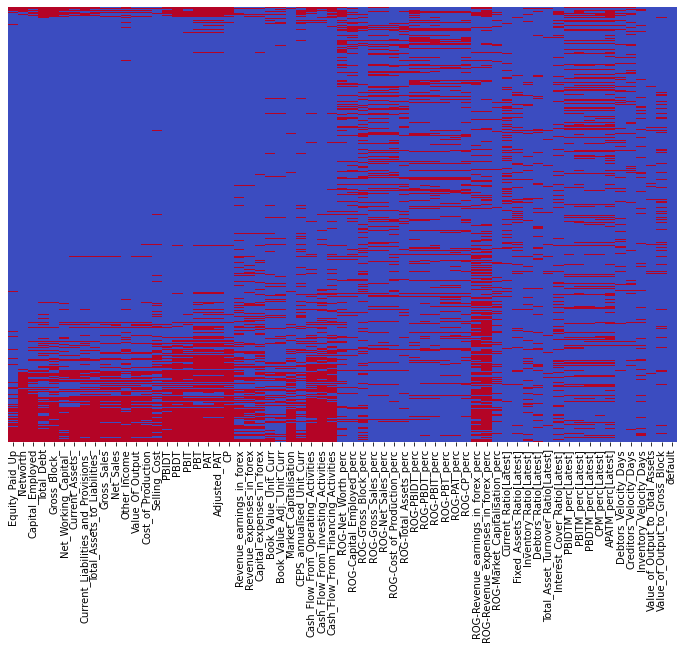

In [101]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

#### We should inspect total missing values by each row.

In [102]:
Company_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
5        9
6       37
7       34
8       24
9       27
10      20
11      34
12      21
13      35
14      27
15      35
16      34
17      31
18      12
19      22
20      23
21      16
22      33
23      38
24      28
25      21
26      14
27      11
28      14
29      33
30      27
31      22
32      21
33      15
34      30
35      28
36      22
37      30
38      11
39      25
40      25
41      27
42      16
43       4
44      23
45      21
46      34
47      27
48      29
49      10
50      28
51      28
52      16
53      35
54      31
55      20
56      17
57      17
58      10
59      12
60      23
61      20
62      29
63      15
64      19
65      16
66      32
67      26
68      15
69      17
70      23
71      16
72       9
73      11
74      34
75      18
76      21
77      26
78      20
79      18
80      20
81       5
82      23
83      10
84      22
85      21
86      14
87      14
88      24
89      23
90      26

#### Let's filter the data which is 90% or more complete at the row level

In [103]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [104]:
print('The shape of the dataframe after filtering is', Company_sub1_temp.shape )

The shape of the dataframe after filtering is (1203, 65)


In [105]:
Company_sub1_temp['default'].value_counts()

0    1085
1     118
Name: default, dtype: int64

In [106]:
Company_sub1_temp['default'].value_counts(normalize = True)

0   0.90
1   0.10
Name: default, dtype: float64

In [164]:
118/1203

0.09808811305070657

#### We came down to 612 rows from 3586 rows frows provided originally, we lose a larger proportion of actual defaulters 388 in the original data vs. only 78 in the subset, threfore, end up losing more than 80% of the actual defaulters.

In [108]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [109]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG-Revenue_expenses_in_forex_perc    0.45
ROG-Revenue_earnings_in_forex_perc    0.37
Cash_Flow_From_Financing_Activities   0.28
PAT                                   0.27
Adjusted_PAT                          0.27
PBT                                   0.26
APATM_perc[Latest]                    0.26
Cash_Flow_From_Investing_Activities   0.24
ROG-Gross_Block_perc                  0.23
CP                                    0.23
PBDT                                  0.23
Cash_Flow_From_Operating_Activities   0.22
ROG-Net_Worth_perc                    0.21
Revenue_earnings_in_forex             0.21
Interest_Cover_Ratio[Latest]          0.20
CPM_perc[Latest]                      0.20
PBIT                                  0.20
PBITM_perc[Latest]                    0.20
PBDTM_perc[Latest]                    0.19
Capital_expenses_in_forex             0.19
Revenue_expenses_in_forex             0.19
ROG-Cost_of_Production_perc           0.19
ROG-Gross_Sales_perc                  0.19
PBIDT      

#### Dropping columns with more than 20% missing values 

In [165]:
Company_sub2 = Company_sub1.drop(['ROG-Revenue_expenses_in_forex_perc','ROG-Revenue_earnings_in_forex_perc','Cash_Flow_From_Financing_Activities','PAT','PBT','Adjusted_PAT','APATM_perc[Latest]','Cash_Flow_From_Investing_Activities','CP','ROG-Gross_Block_perc','PBDT','Revenue_expenses_in_forex','Cash_Flow_From_Operating_Activities','ROG-Net_Worth_perc'],
                           axis = 1)

In [228]:
print('The shape of the dataframe after dropping columns with more than 20% missing values is',Company_sub2.shape)

The shape of the dataframe after dropping columns with more than 20% missing values is (3586, 51)


#### Segregate the predictors and response 

In [167]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

#### Scale the predictors 

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [169]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

#### Imputing the remaining missing values

In [201]:
from sklearn.impute import KNNImputer #MICE FancyImpute

In [202]:
imputer = KNNImputer(n_neighbors=10)

In [203]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [204]:
Company_imputed.isnull().sum()

Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block_                           0
Net_Working_Capital_                   0
Current_Assets_                        0
Current_Liabilities_and_Provisions_    0
Total_Assets_to_Liabilities_           0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
Selling_Cost                           0
PBIDT                                  0
PBIT                                   0
Revenue_earnings_in_forex              0
Capital_expenses_in_forex              0
Book_Value_Unit_Curr                   0
Book_Value_Adj._Unit_Curr              0
Market_Capitalisation                  0
CEPS_annualised_Unit_Curr              0
ROG-Capital_Employed_perc              0
ROG-Gross_Sales_

In [229]:
Company_imputed.isnull().sum().sum()

0

#### Inspect possible correlations between independent variables 

<AxesSubplot:>

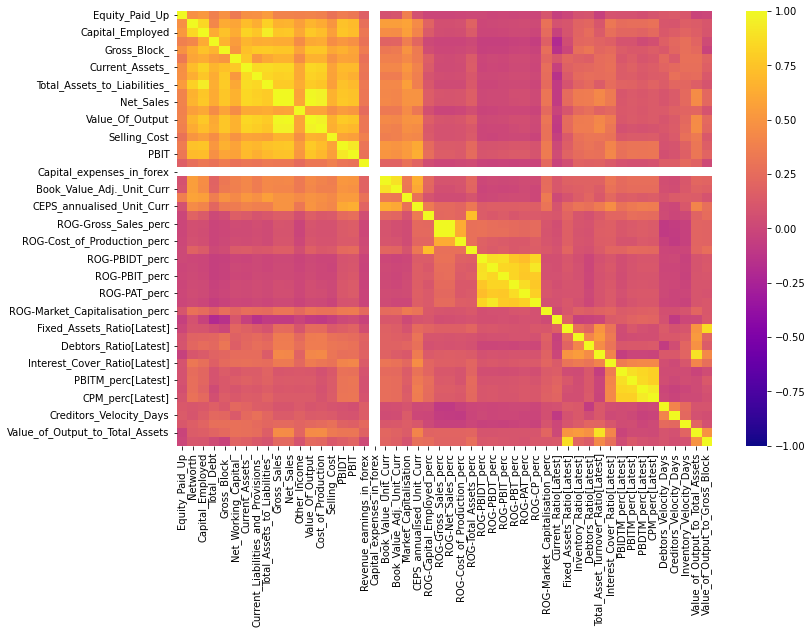

In [205]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

<B>EDA

In [250]:
Company_EDA = Company_imputed[['default','Networth', 'Capital_Employed', 'Gross_Block_', 'Current_Assets_','Current_Liabilities_and_Provisions_','Value_Of_Output','Cost_of_Production','PBIDT','PBIT','Book_Value_Unit_Curr','Book_Value_Adj._Unit_Curr','Current_Ratio[Latest]','Total_Asset_Turnover_Ratio[Latest]','Interest_Cover_Ratio[Latest]','Value_of_Output_to_Total_Assets']]

In [249]:
Company_EDA.head()

Networth  Capital_Employed  Gross_Block_  Current_Assets_  \
0     -0.28             -0.45         -0.14            -0.07   
1      0.05              1.01          0.94             0.45   
2      1.72              2.10          2.38             1.94   
3      0.72              1.09          0.70             0.92   
4      0.64              0.19          0.63             0.17   

   Current_Liabilities_and_Provisions_  Value_Of_Output  Cost_of_Production  \
0                                -0.34            -0.61                0.79   
1                                 0.99             0.45                0.42   
2                                 2.16             1.83                3.53   
3                                 0.24             0.32                0.51   
4                                 0.08            -0.29                1.28   

   PBIDT  PBIT  Book_Value_Unit_Curr  Book_Value_Adj._Unit_Curr  \
0  -0.37 -0.34                 -0.63                      -0.62   
1   0.49  3.43                 -1.15                      -1.25   
2   1.56  1.23                  1.59                       2.01   
3   0.01  0.28                 -1.77                      -1.98   
4   0.24  0.08                  0.58                      -0.01   

   Current_Ratio[Latest]  Total_Asset_Turnover_Ratio[Latest]  \
0                  -1.33                               -0.91   
1                  -1.27                               -0.58   
2                  -0.35                               -0.91   
3                  -1.26                               -0.91   
4                  -0.87                               -0.90   

   Interest_Cover_Ratio[Latest]  Value_of_Output_to_Total_Assets  
0                         -0.65                            -0.97  
1                         -0.94                            -0.50  
2                         -1.56                            -1.02  
3                         -0.63                            -0.61  
4                         -0.89                            -0.96

In [208]:
Company_EDA.tail()

Networth  Capital_Employed  Gross_Block_  Current_Assets_  \
3581      0.02             -0.34         -0.13            -0.61   
3582      0.14              0.42          0.29             0.05   
3583      0.96              0.50          1.15             1.19   
3584      1.18              1.10          1.00             0.69   
3585      0.24             -0.32          0.29             0.07   

      Current_Liabilities_and_Provisions_  Value_Of_Output  \
3581                                -0.52            -0.45   
3582                                 1.15             0.16   
3583                                 1.26             1.48   
3584                                 1.11             0.63   
3585                                -0.04            -0.31   

      Cost_of_Production  PBIDT  PBIT  Book_Value_Unit_Curr  \
3581               -0.14  -0.42 -0.35                  0.69   
3582                0.11   1.03  0.95                  2.11   
3583                1.68   1.29  1.68                  1.86   
3584                0.52   0.80  0.75                  1.71   
3585               -0.46  -0.00  0.15                  0.25   

      Book_Value_Adj._Unit_Curr  Current_Ratio[Latest]  \
3581                       0.51                  -1.35   
3582                       2.62                  -0.97   
3583                       1.29                  -0.63   
3584                       2.15                  -0.54   
3585                       0.64                  -0.78   

      Total_Asset_Turnover_Ratio[Latest]  Interest_Cover_Ratio[Latest]  \
3581                               -0.91                         -0.56   
3582                               -0.58                          0.87   
3583                                1.98                          3.32   
3584                               -0.48                          1.40   
3585                               -0.49                          0.66   

      Value_of_Output_to_Total_Assets  
3581                            -0.06  
3582                            -0.53  
3583                             1.18  
3584                            -0.43  
3585                            -0.34

In [209]:
Company_EDA.describe(percentiles=[.25,0.50,0.75,0.90]).T

count  mean  std   min   25%   50%  75%  \
Networth                            3586.00  0.22 1.10 -3.21 -0.52 -0.28 0.78   
Capital_Employed                    3586.00  0.20 1.09 -3.14 -0.58 -0.32 0.67   
Gross_Block_                        3586.00  0.20 1.10 -1.19 -0.59 -0.38 0.70   
Current_Assets_                     3586.00  0.21 1.11 -0.69 -0.61 -0.32 0.74   
Current_Liabilities_and_Provisions_ 3586.00  0.20 1.09 -0.62 -0.59 -0.35 0.66   
Value_Of_Output                     3586.00  0.23 1.15 -1.57 -0.60 -0.37 0.74   
Cost_of_Production                  3586.00  0.24 1.15 -0.84 -0.60 -0.37 0.76   
PBIDT                               3586.00  0.28 1.18 -3.12 -0.47 -0.31 0.82   
PBIT                                3586.00  0.27 1.16 -3.13 -0.43 -0.29 0.86   
Book_Value_Unit_Curr                3586.00  0.08 0.98 -2.96 -0.56 -0.24 0.61   
Book_Value_Adj._Unit_Curr           3586.00  0.08 0.99 -2.90 -0.57 -0.23 0.63   
Current_Ratio[Latest]               3586.00  0.03 0.94 -1.35 -0.54 -0.14 0.41   
Total_Asset_Turnover_Ratio[Latest]  3586.00  0.06 1.02 -0.91 -0.83 -0.28 0.72   
Interest_Cover_Ratio[Latest]        3586.00  0.07 0.96 -3.04 -0.56 -0.10 0.57   
Value_of_Output_to_Total_Assets     3586.00  0.04 1.01 -1.48 -0.87 -0.26 0.73   

                                     90%  max  
Networth                            1.95 4.06  
Capital_Employed                    1.96 4.16  
Gross_Block_                        2.03 4.09  
Current_Assets_                     2.03 4.28  
Current_Liabilities_and_Provisions_ 1.96 4.23  
Value_Of_Output                     2.16 4.14  
Cost_of_Production                  2.21 4.17  
PBIDT                               2.24 4.15  
PBIT                                2.21 4.07  
Book_Value_Unit_Curr                1.47 3.41  
Book_Value_Adj._Unit_Curr           1.50 3.34  
Current_Ratio[Latest]               1.21 3.92  
Total_Asset_Turnover_Ratio[Latest]  1.57 3.24  
Interest_Cover_Ratio[Latest]        1.33 3.61  
Value_of_Output_to_Total_Assets     1.56 3.27

In [210]:
Company_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Networth                             3586 non-null   float64
 1   Capital_Employed                     3586 non-null   float64
 2   Gross_Block_                         3586 non-null   float64
 3   Current_Assets_                      3586 non-null   float64
 4   Current_Liabilities_and_Provisions_  3586 non-null   float64
 5   Value_Of_Output                      3586 non-null   float64
 6   Cost_of_Production                   3586 non-null   float64
 7   PBIDT                                3586 non-null   float64
 8   PBIT                                 3586 non-null   float64
 9   Book_Value_Unit_Curr                 3586 non-null   float64
 10  Book_Value_Adj._Unit_Curr            3586 non-null   float64
 11  Current_Ratio[Latest]         

In [211]:
Company_EDA.shape

(3586, 15)

In [212]:
Company_EDA.isnull().sum()

Networth                               0
Capital_Employed                       0
Gross_Block_                           0
Current_Assets_                        0
Current_Liabilities_and_Provisions_    0
Value_Of_Output                        0
Cost_of_Production                     0
PBIDT                                  0
PBIT                                   0
Book_Value_Unit_Curr                   0
Book_Value_Adj._Unit_Curr              0
Current_Ratio[Latest]                  0
Total_Asset_Turnover_Ratio[Latest]     0
Interest_Cover_Ratio[Latest]           0
Value_of_Output_to_Total_Assets        0
dtype: int64

In [265]:
la = Company_EDA.duplicated()
Company_EDA[la]

Empty DataFrame
Columns: [default, Networth, Capital_Employed, Gross_Block_, Current_Assets_, Current_Liabilities_and_Provisions_, Value_Of_Output, Cost_of_Production, PBIDT, PBIT, Book_Value_Unit_Curr, Book_Value_Adj._Unit_Curr, Current_Ratio[Latest], Total_Asset_Turnover_Ratio[Latest], Interest_Cover_Ratio[Latest], Value_of_Output_to_Total_Assets]
Index: []

In [213]:
Company_EDA.skew(axis = 0, skipna = True)

Networth                              1.20
Capital_Employed                      1.41
Gross_Block_                          1.45
Current_Assets_                       1.42
Current_Liabilities_and_Provisions_   1.52
Value_Of_Output                       1.43
Cost_of_Production                    1.38
PBIDT                                 1.17
PBIT                                  1.01
Book_Value_Unit_Curr                  0.93
Book_Value_Adj._Unit_Curr             0.91
Current_Ratio[Latest]                 1.34
Total_Asset_Turnover_Ratio[Latest]    0.98
Interest_Cover_Ratio[Latest]          0.78
Value_of_Output_to_Total_Assets       0.87
dtype: float64

In [252]:
Company_EDA_num = Company_EDA.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(Company_EDA_num.columns.values)
len(lstnumericcolumns)

16

In [253]:
def univariateAnalysis_numeric(column,nbins):
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(Company_EDA[column], kde=True, color='g', rug=True);
    plt.show()

Distribution of default
----------------------------------------------------------------------------


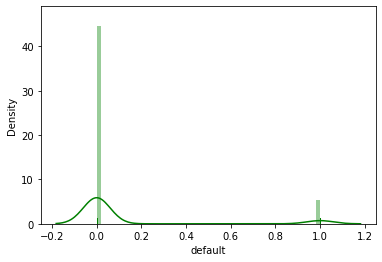

Distribution of Networth
----------------------------------------------------------------------------


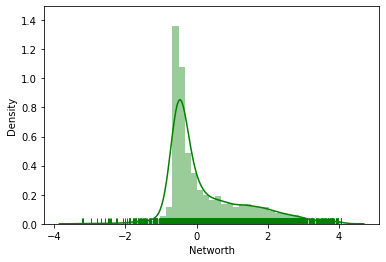

Distribution of Capital_Employed
----------------------------------------------------------------------------


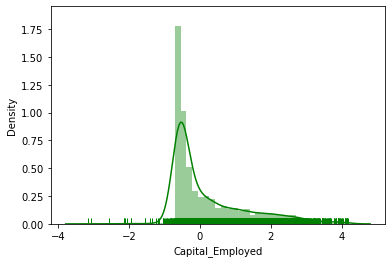

Distribution of Gross_Block_
----------------------------------------------------------------------------


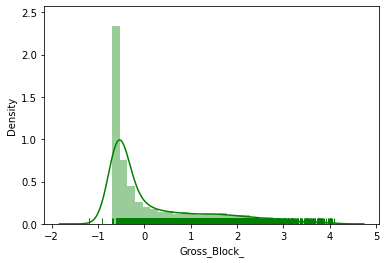

Distribution of Current_Assets_
----------------------------------------------------------------------------


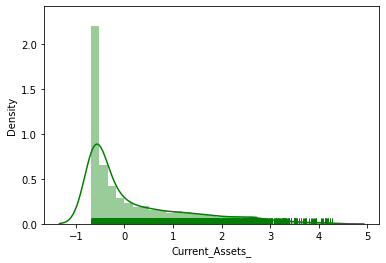

Distribution of Current_Liabilities_and_Provisions_
----------------------------------------------------------------------------


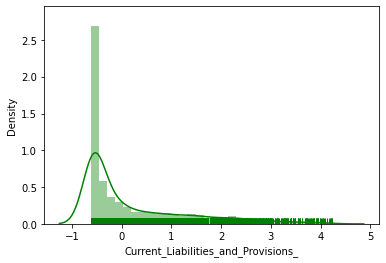

Distribution of Value_Of_Output
----------------------------------------------------------------------------


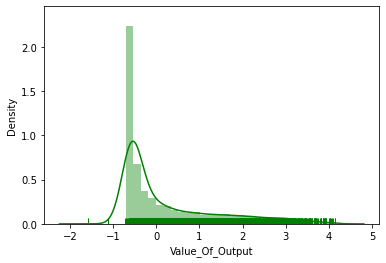

Distribution of Cost_of_Production
----------------------------------------------------------------------------


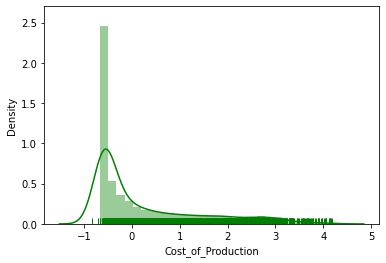

Distribution of PBIDT
----------------------------------------------------------------------------


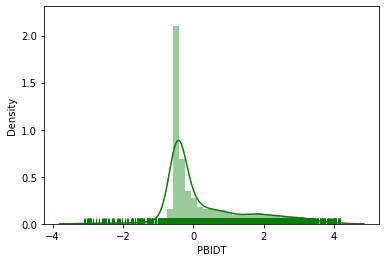

Distribution of PBIT
----------------------------------------------------------------------------


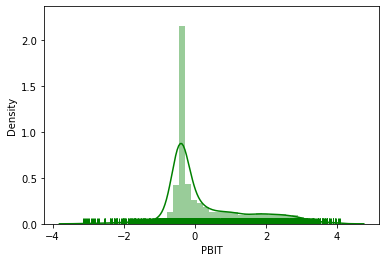

Distribution of Book_Value_Unit_Curr
----------------------------------------------------------------------------


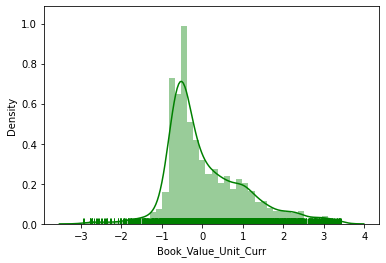

Distribution of Book_Value_Adj._Unit_Curr
----------------------------------------------------------------------------


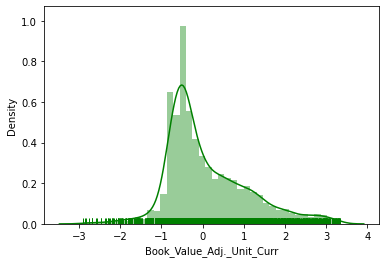

Distribution of Current_Ratio[Latest]
----------------------------------------------------------------------------


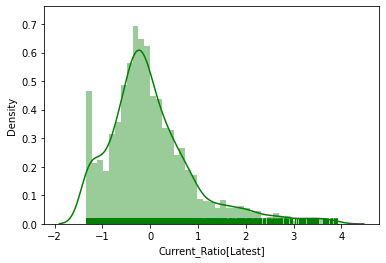

Distribution of Total_Asset_Turnover_Ratio[Latest]
----------------------------------------------------------------------------


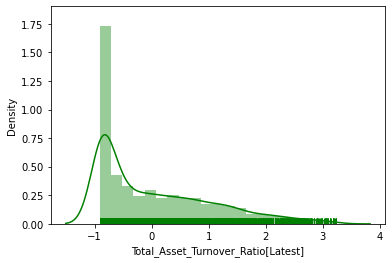

Distribution of Interest_Cover_Ratio[Latest]
----------------------------------------------------------------------------


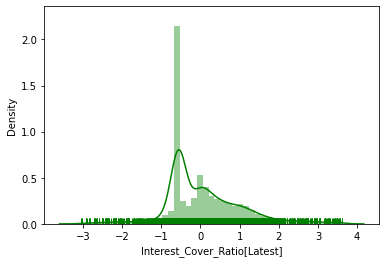

Distribution of Value_of_Output_to_Total_Assets
----------------------------------------------------------------------------


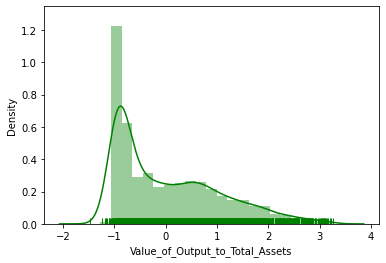

In [254]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [270]:
def univariateAnalysis_numeric(column,nbins):
    print("Histogram of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.histplot(x=Company_EDA[column],color='y',bins=30)
    plt.show()

Histogram of default
----------------------------------------------------------------------------


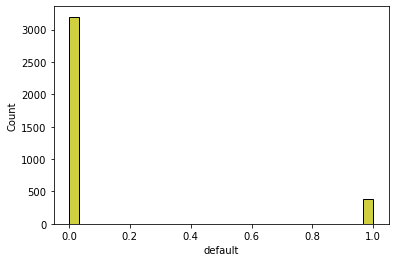

Histogram of Networth
----------------------------------------------------------------------------


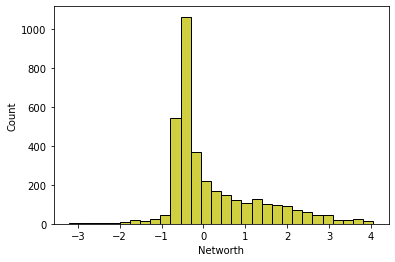

Histogram of Capital_Employed
----------------------------------------------------------------------------


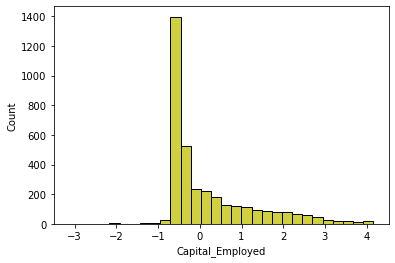

Histogram of Gross_Block_
----------------------------------------------------------------------------


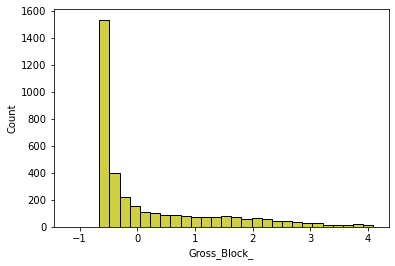

Histogram of Current_Assets_
----------------------------------------------------------------------------


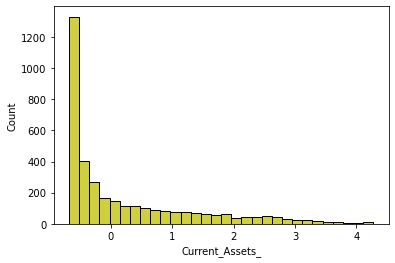

Histogram of Current_Liabilities_and_Provisions_
----------------------------------------------------------------------------


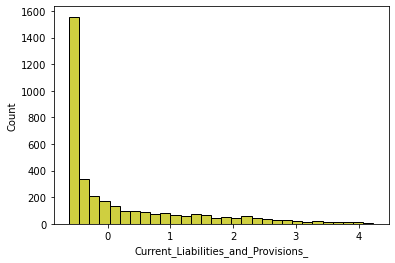

Histogram of Value_Of_Output
----------------------------------------------------------------------------


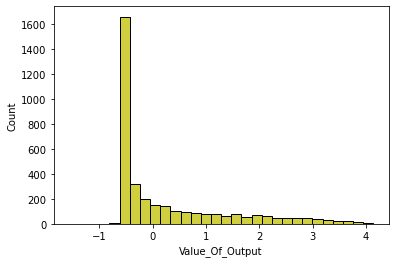

Histogram of Cost_of_Production
----------------------------------------------------------------------------


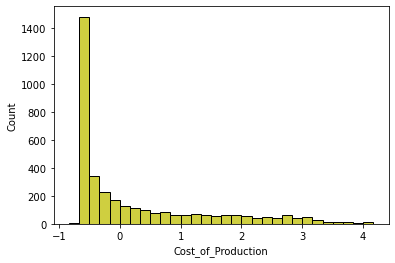

Histogram of PBIDT
----------------------------------------------------------------------------


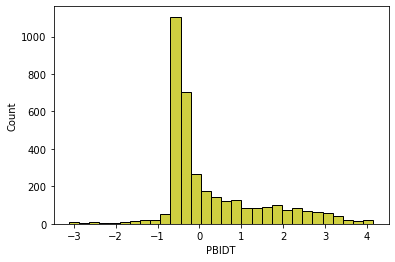

Histogram of PBIT
----------------------------------------------------------------------------


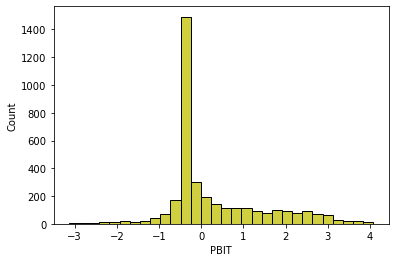

Histogram of Book_Value_Unit_Curr
----------------------------------------------------------------------------


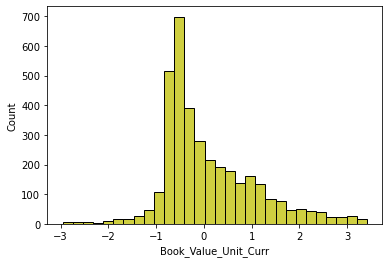

Histogram of Book_Value_Adj._Unit_Curr
----------------------------------------------------------------------------


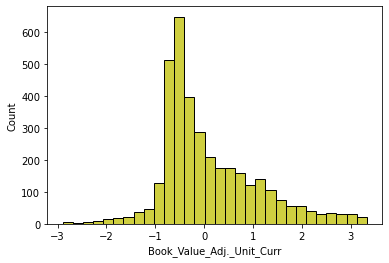

Histogram of Current_Ratio[Latest]
----------------------------------------------------------------------------


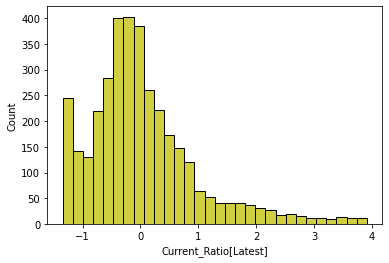

Histogram of Total_Asset_Turnover_Ratio[Latest]
----------------------------------------------------------------------------


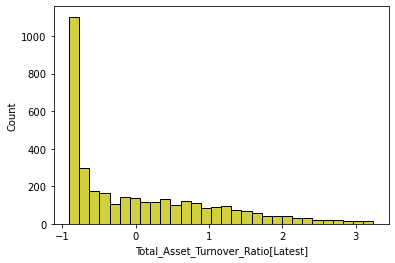

Histogram of Interest_Cover_Ratio[Latest]
----------------------------------------------------------------------------


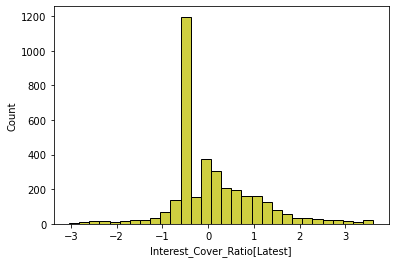

Histogram of Value_of_Output_to_Total_Assets
----------------------------------------------------------------------------


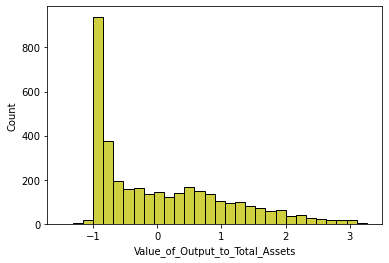

In [271]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [274]:
def univariateAnalysis_numeric(column,nbins):
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=Company_EDA[column])
    plt.show()

In [275]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

BoxPlot of default
----------------------------------------------------------------------------


TypeError: string indices must be integers

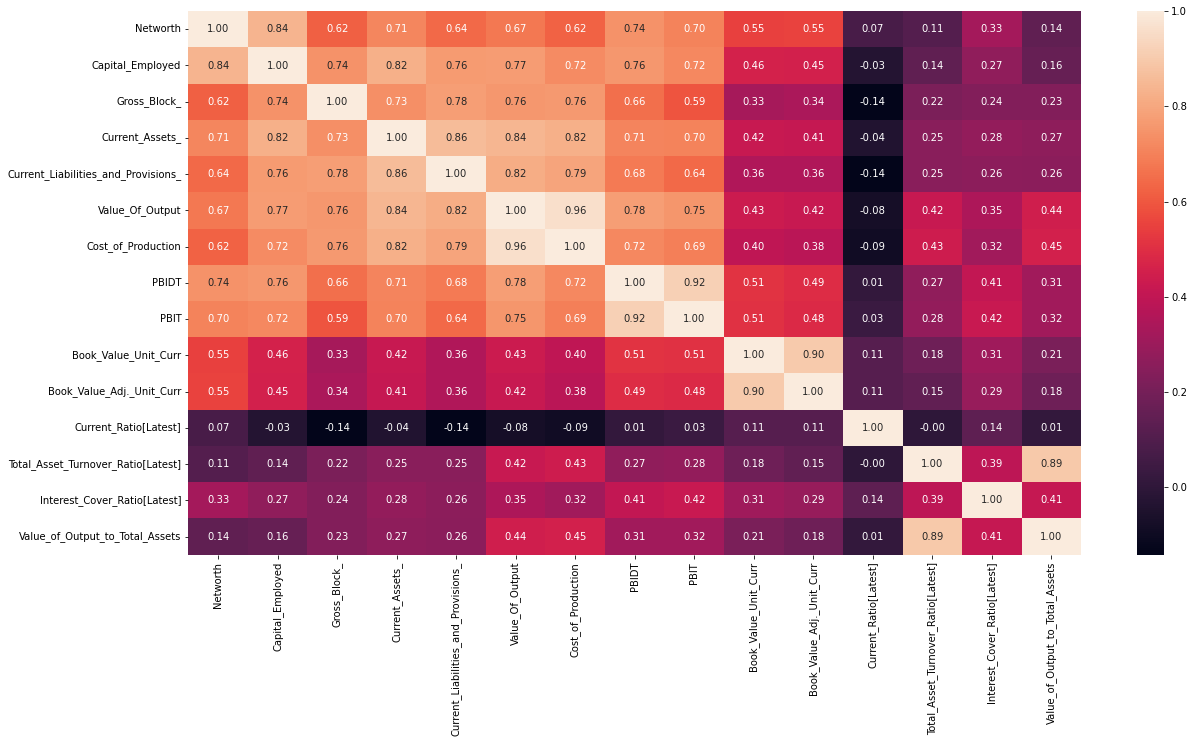

In [221]:
plt.figure(figsize=(20,10))
sns.heatmap(Company_EDA.corr(),annot=True,fmt=".2f");


<Figure size 432x288 with 0 Axes>

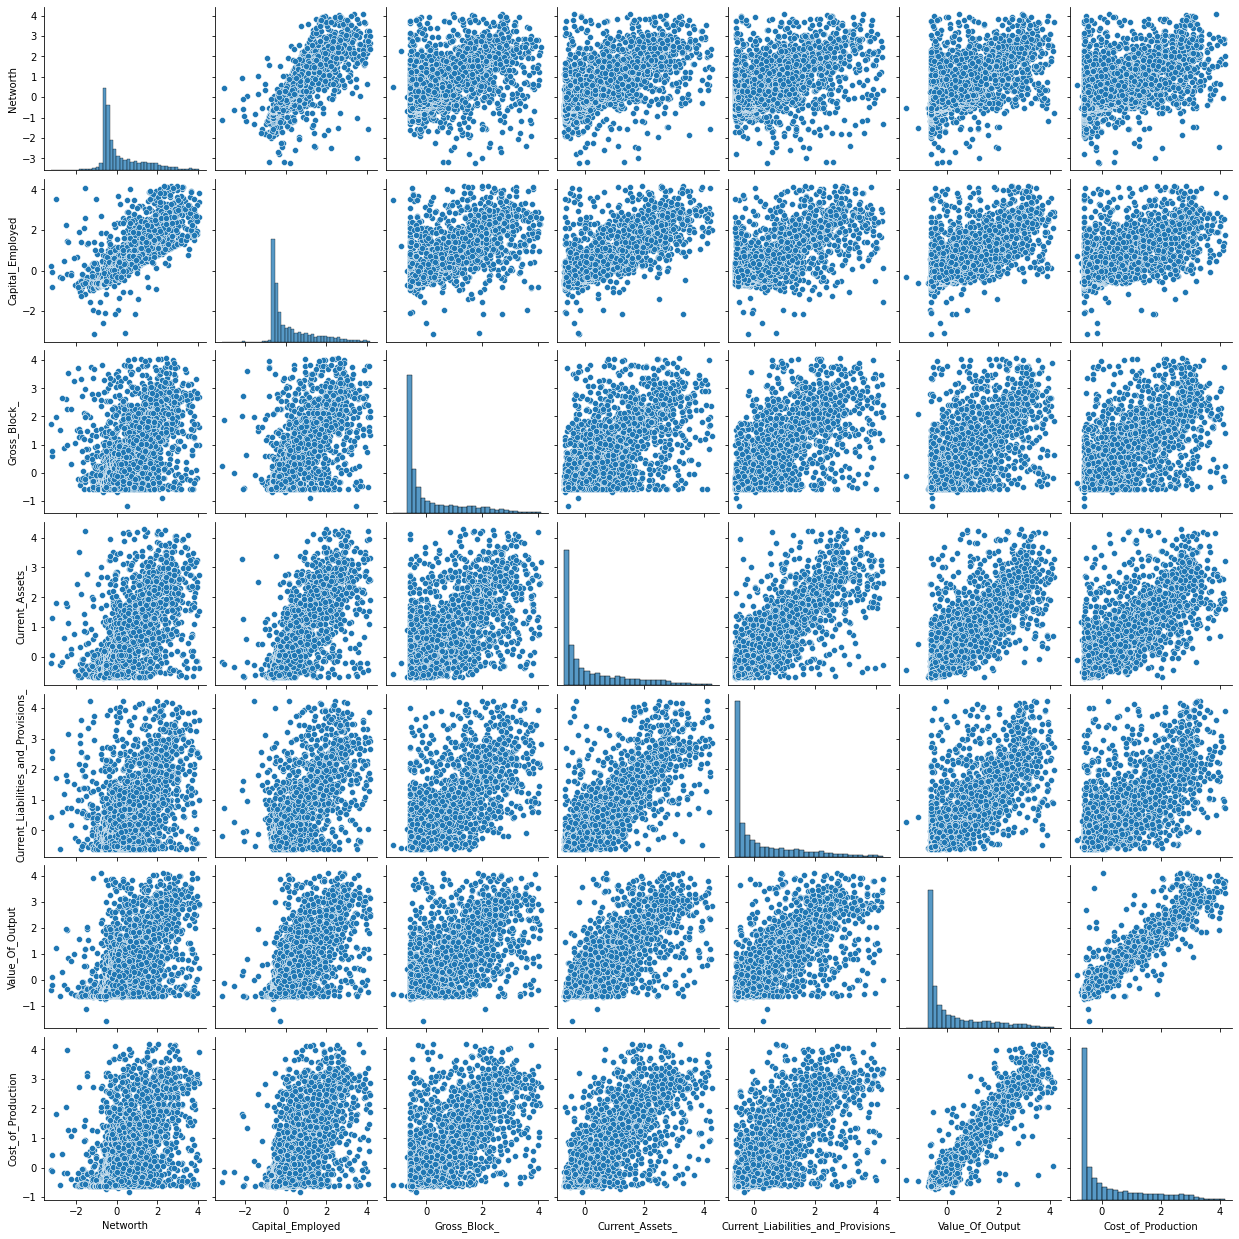

In [222]:
plt.figure()
sns.pairplot(Company_EDA, vars=['Networth', 'Capital_Employed', 'Gross_Block_', 'Current_Assets_','Current_Liabilities_and_Provisions_','Value_Of_Output','Cost_of_Production',], )
plt.show()

<B>MODELLING: 

In [234]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE #recursive feature elimination
from sklearn.linear_model import LogisticRegression

#### Splitting the data into train and test sets

In [236]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42)

In [237]:
y_train.value_counts(1)

0.00   0.90
1.00   0.10
Name: default, dtype: float64

In [238]:
y_test.value_counts(1)

0.00   0.88
1.00   0.12
Name: default, dtype: float64

In [239]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (2402, 50)
Number of rows and columns of the training set for the dependent variable: (2402,)
Number of rows and columns of the test set for the independent variables: (1184, 50)
Number of rows and columns of the test set for the dependent variable: (1184,)


#### For modeling we will use Logistic Regression with recursive feature elimination

In [240]:
LogR = LogisticRegression()

In [241]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [242]:
selector = selector.fit(X_train, y_train)

In [243]:
selector.n_features_

15

In [244]:
selector.ranking_

array([34,  1,  1,  5,  1,  8,  1,  1,  2,  3,  4, 10,  1,  1, 24,  1,  1,
       35, 36,  1,  1, 16, 33,  6, 14, 19, 20,  7, 30, 13, 22, 18, 29, 12,
       32,  1,  9, 21, 23,  1,  1, 11, 31, 25, 26, 27, 17, 15,  1, 28])

In [245]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

Feature  Rank
1                              Networth     1
2                      Capital_Employed     1
4                          Gross_Block_     1
6                       Current_Assets_     1
7   Current_Liabilities_and_Provisions_     1
12                      Value_Of_Output     1
13                   Cost_of_Production     1
15                                PBIDT     1
16                                 PBIT     1
19                 Book_Value_Unit_Curr     1
20            Book_Value_Adj._Unit_Curr     1
35                Current_Ratio[Latest]     1
39   Total_Asset_Turnover_Ratio[Latest]     1
40         Interest_Cover_Ratio[Latest]     1
48      Value_of_Output_to_Total_Assets     1

#### Validating the model on train and test set 

In [188]:
from sklearn.metrics import confusion_matrix, classification_report

In [189]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [190]:
print(confusion_matrix(y_train, pred_train))

[[2138   19]
 [  97  148]]


In [191]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [192]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.89      0.60      0.72       245

    accuracy                           0.95      2402
   macro avg       0.92      0.80      0.85      2402
weighted avg       0.95      0.95      0.95      2402



In [193]:
print(confusion_matrix(y_test, pred_test))

[[1024   17]
 [  44   99]]


In [194]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.85      0.69      0.76       143

    accuracy                           0.95      1184
   macro avg       0.91      0.84      0.87      1184
weighted avg       0.95      0.95      0.95      1184



We see poor recall score for both train and test

In [195]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [196]:
selector_smote = selector.fit(X_res, y_res)

In [197]:
selector_smote.n_features_

15

In [198]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [199]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      2157
         1.0       0.91      0.93      0.92      2157

    accuracy                           0.92      4314
   macro avg       0.92      0.92      0.92      4314
weighted avg       0.92      0.92      0.92      4314



In [200]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      1041
         1.0       0.52      0.96      0.68       143

    accuracy                           0.89      1184
   macro avg       0.76      0.92      0.81      1184
weighted avg       0.94      0.89      0.90      1184



Finally, we are able to achieve a descent recall value without overfitting. Considering the opportunities such as outliers, missing values and correlated features this is a fairly good model. It can be improved if we get better quality data where the features explaining the default are not missing to this extent. Of course we can try other techniques which are not sensitive towards missing values and outliers.